In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Building a DIY Multimodal Question Answering System with Vertex AI (A Beginner's Guide - Multimodal RAG)

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fqa-ops%2Fbuilding_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/qa-ops/building_DIY_multimodal_qa_system_with_mRAG.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
</table>

| | |
|-|-|
|Author(s) | [Lavi Nigam](https://github.com/lavinigam-gcp) |

<div class="alert alert-block alert-warning">
<b>⚠️ This is a new version of the old mRAG notebook with modifications and new data. You can refer to the old notebook here:  ⚠️</b>
</div>

[**intro_multimodal_rag.ipynb**](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb)

## Overview


This guide is your hands-on introduction to creating a question answering system that understands both text and images. We'll build this system from the ground up using Google's Vertex AI, giving you a clear understanding of how it works without relying on complex third-party tools.


## Why Build It Yourself?

Large Language Models (LLMs) are powerful, but they can seem like a "black box". By building our own system, we'll break open that box and explore the core concepts. This will give you the knowledge to customize and optimize every aspect of your question answering system, whether you ultimately choose to code everything yourself or use external libraries.


## What We'll Do:

* **Focus on Fundamentals**: We'll start with the essential design pattern of "Retrieval Augmented Generation" (RAG) – a way to find and use relevant information to answer questions.

* **Work with Text and Images**: We'll expand RAG to handle both text and images found in PDF documents. Future guides in this series will explore even more types of data, like videos and audio.

* **Use Vertex AI**: We'll only use Google's Vertex AI Embeddings API and Gemini API, ensuring you have complete control and understanding of the building blocks.


By the end of this guide, you'll have a solid foundation in building multimodal question answering systems, empowering you to create smarter applications that can understand and respond to a wider range of information.


### Gemini

Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. The Gemini API gives you access to the Gemini 1.0 Pro Vision, Gemini 1.0 Pro & Gemini 1.5 Pro models.

### Comparing text-based and multimodal RAG

Multimodal RAG offers several advantages over text-based RAG:

1. **Enhanced knowledge access:** Multimodal RAG can access and process both textual and visual information, providing a richer and more comprehensive knowledge base for the LLM.
2. **Improved reasoning capabilities:** By incorporating visual cues, multimodal RAG can make better informed inferences across different types of data modalities.

This notebook shows you how to implement DIY RAG with Gemini API in Vertex AI
 and Vertex AI Embeddings API; [text embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text-embeddings), and [multimodal embeddings](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/multimodal-embeddings), to build a document search engine.

Through hands-on examples, you will discover how to construct a multimedia-rich metadata repository of your document sources, enabling search, comparison, and reasoning across diverse information streams.

### Objectives

This notebook provides a guide to building a document search engine using multimodal retrieval augmented generation (RAG), step by step:

1. Extract and store metadata of documents containing both text and images, and generate embeddings the documents
2. Search the metadata with text queries to find similar text or images
3. Search the metadata with image queries to find similar images
4. Using a text query as input, search for contextual answers using both text and images

### Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.


## Getting Started


### Install Vertex AI SDK for Python and other dependencies


In [ ]:
%pip install --upgrade --user google-cloud-aiplatform pymupdf rich

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information


In [ ]:
# Define project information

import sys

PROJECT_ID = "YOUR_PROJECT_ID"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on Colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

In [ ]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [ ]:
from IPython.display import display
from rich import print as rich_print
from rich.markdown import Markdown as rich_Markdown
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmBlockThreshold,
    HarmCategory,
    Image,
)
from vertexai.language_models import TextEmbeddingModel
from vertexai.vision_models import MultiModalEmbeddingModel

### Load the Gemini 1.5 Pro, Gemini 1.5 Pro Flash, Gemini 1.0 Pro Vision and Gemini 1.0 Pro models


Learn more about each models and their differences: [here](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/send-multimodal-prompts)

Learn about the quotas: [here](https://cloud.google.com/vertex-ai/generative-ai/docs/quotas)

In [ ]:
# Instantiate text model with appropriate name and version
text_model = GenerativeModel("gemini-1.0-pro")  # works with text, code

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15 = GenerativeModel(
    "gemini-1.5-pro"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - complex reasoning

# Multimodal models: Choose based on your performance/cost needs
multimodal_model_15_flash = GenerativeModel(
    "gemini-1.5-flash"
)  # works with text, code, images, video(with or without audio) and audio(mp3) with 1M input context - faster inference

multimodal_model_10 = GenerativeModel(
    "gemini-1.0-pro-vision-001"
)  # works with text, code, video(without audio) and images with 16k input context

# Load text embedding model from pre-trained source
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-004")

# Load multimodal embedding model from pre-trained source
multimodal_embedding_model = MultiModalEmbeddingModel.from_pretrained(
    "multimodalembedding"
)  # works with image, image with caption(~32 words), video, video with caption(~32 words)

#### Get documents and images from GCS

In [ ]:
# download documents and images used in this notebook - will take ~30 sec
!gsutil -m -q rsync -r gs://github-repo/rag/intro_multimodal_rag/intro_multimodal_rag_v2 .
print("Download completed")

## Building metadata of documents containing text and images

### The data

The source data that you will use in this notebook are:


* [Google Cloud TPU Scaling blog](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/Google%20Cloud%20TPU%20blog.pdf)
* [Gemini 1.5 Technical Report](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/gemini_v1_5_report_technical.pdf)
* [Google Gemma Technical Paper](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/gemma_technical_paper.pdf)
* [Med-Gemini Technical Paper](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/data/med_gemini.pdf)



You can also use your data, by first deleting the current files and then placing your files in the `data/` folder.

### Import helper functions to build metadata

Before building the Multimodal Question Answering System with Vertex AI, it's important to have metadata of all the text and images in the document. For references and citations purposes, the metadata should contain essential elements, including page number, file name, image counter, and so on. Hence, as a next step, you will generate embeddings from the metadata, which is required to perform similarity search when querying the data.

In [ ]:
from multimodal_qa_with_rag_utils import get_document_metadata, set_global_variable

set_global_variable("text_embedding_model", text_embedding_model)
set_global_variable("multimodal_embedding_model", multimodal_embedding_model)

 You can also view the code (`multimodal_qa_with_rag_utils`) [directly](https://storage.googleapis.com/github-repo/rag/intro_multimodal_rag/utils/multimodal_qa_with_rag_utils.py).

### Extract and store metadata of text and images from a document

You just imported a function called `get_document_metadata()`. This function extracts text and image metadata from a document, and returns two dataframes, namely *text_metadata* and *image_metadata*, as outputs. If you want to find out more about how `get_document_metadata()` function is implemented using Gemini and the embedding models, you can take look at the [source code](https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/intro_multimodal_rag_utils.py) directly.

The reason for extraction and storing both text metadata and image metadata is that just by using either of the two alone is not sufficient to come out with a relevent answer. For example, the relevant answers could be in visual form within a document, but text-based RAG won't be able to take into consideration of the visual images. You will also be exploring this example later in this notebook.


At the next step, you will use the function to extract and store metadata of text and images from a document. Please note that the following cell may take a few minutes to complete:

**NOTE: Given that we are loading 4 files with roughly 200 pages and approximately 84 images, the cell below will take approximately 7 minutes to run. We recommend loading pre-computed metadata instead.**

In [ ]:
%%time
# Specify the PDF folder with multiple PDF ~7m

print(
    "Removing pre-existing images folder, since you are running the logic from scratch"
)
! rm -rf images/

pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
# image_description_prompt = """Explain what is going on in the image.
# If it's a table, extract all elements of the table.
# If it's a graph, explain the findings in the graph.
# Do not include any numbers that are not mentioned in the image.
# """

image_description_prompt = """You are a technical image analysis expert. You will be provided with various types of images extracted from documents like research papers, technical blogs, and more.
Your task is to generate concise, accurate descriptions of the images without adding any information you are not confident about.
Focus on capturing the key details, trends, or relationships depicted in the image.

Important Guidelines:
* Prioritize accuracy:  If you are uncertain about any detail, state "Unknown" or "Not visible" instead of guessing.
* Avoid hallucinations: Do not add information that is not directly supported by the image.
* Be specific: Use precise language to describe shapes, colors, textures, and any interactions depicted.
* Consider context: If the image is a screenshot or contains text, incorporate that information into your description.
"""


# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model_15,  # we are passing Gemini 1.5 Pro
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    add_sleep_after_document=True,  # Uncomment this if you are running into API quota issues
    sleep_time_after_document=5,  # Increase the value in seconds, if you are still getting quota issues. It will slow down the processing.
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")

Removing pre-exsisting images folder, since you are running the logic from scratch


 Processing the file: --------------------------------- data/gemma_technical_paper.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/gemma_technical_paper.pdf_image_0_0_153.jpeg
Processing page: 2
Processing page: 3
Processing page: 4
Processing page: 5
Processing page: 6
Processing page: 7
Processing page: 8
Processing page: 9
Processing page: 10
Processing page: 11
Processing page: 12
Processing page: 13
Processing page: 14
Processing page: 15
Processing page: 16
Processing page: 17

 
 Sleeping for  5  sec before processing the next document to avoid quota issues. You can disable it: "add_sleep_after_document = False"  


 Processing the file: --------------------------------- data/gemini_v1_5_report_technical.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/gemini_v1_5_report_technical.pdf_image_0_0_1910.jpeg
Processing page: 2
Processing page: 3
Pro

If you would like to pass additional parameters to Gemini while building metadata, here are some options:

In [ ]:
# # Parameters for Gemini API call.
# # reference for parameters: https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/gemini

# generation_config=  GenerationConfig(temperature=0.2, max_output_tokens=2048)

# # Set the safety settings if Gemini is blocking your content or you are facing "ValueError("Content has no parts")" error or "Exception occurred" in your data.
# # ref for settings and thresholds: https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/configure-safety-attributes

# safety_settings = {
#                   HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
#                   HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
#                   }

# # You can also pass parameters and safety_setting to "get_gemini_response" function

### Load pre-computed metadata of text and images from source document

**If you are facing constant issues with Quota or want to focus on the outputs, you should load pre-computed metadata.**

In [ ]:
# import pickle

# # Load the pickle file
# with open("mrag_metadata.pkl", "rb") as f:
#     data = pickle.load(f)

# # Extract the DataFrames
# text_metadata_df = data["text_metadata"]
# image_metadata_df = data["image_metadata"]

#### Inspect the processed text metadata


The following cell will produce a metadata table which describes the different parts of text metadata, including:

- **text**: the original text from the page
- **text_embedding_page**: the embedding of the original text from the page
- **chunk_text**: the original text divided into smaller chunks
- **chunk_number**: the index of each text chunk
- **text_embedding_chunk**: the embedding of each text chunk

In [ ]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,gemma_technical_paper.pdf,1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.029665455222129822, 0.043536581099033356, -...",1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.035918254405260086, 0.039294395595788956, -..."
1,gemma_technical_paper.pdf,1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.029665455222129822, 0.043536581099033356, -...",2,"Gemma, a family of open models\nbased on Googl...","[0.03788634389638901, 0.05161239951848984, -0...."
2,gemma_technical_paper.pdf,1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.029665455222129822, 0.043536581099033356, -...",3,"d for dialogue, instruction-following, help-\n...","[0.045551132410764694, 0.04680870845913887, -0..."
3,gemma_technical_paper.pdf,1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.029665455222129822, 0.043536581099033356, -...",4,"ce (Cobbe et al.,\n2021; Hendrycks et al., 202...","[0.017123950645327568, 0.05736316367983818, -0..."
4,gemma_technical_paper.pdf,1,2024-02-21\nGemma: Open Models Based on Gemini...,"[0.029665455222129822, 0.043536581099033356, -...",5,rigorous evaluation and\nanalysis of current ...,"[0.03978141397237778, 0.029347488656640053, -0..."


#### Inspect the processed image metadata

The following cell will produce a metadata table which describes the different parts of image metadata, including:
* **img_desc**: Gemini-generated textual description of the image.
* **mm_embedding_from_text_desc_and_img**: Combined embedding of image and its description, capturing both visual and textual information.
* **mm_embedding_from_img_only**: Image embedding without description, for comparison with description-based analysis.
* **text_embedding_from_image_description**: Separate text embedding of the generated description, enabling textual analysis and comparison.

In [ ]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,gemma_technical_paper.pdf,1,1,images/gemma_technical_paper.pdf_image_0_0_153...,The image shows the Google logo in its standar...,"[-0.0264111869, 0.0349279381, -0.0139624262, -...","[0.025234034284949303, 0.040900733321905136, -..."
1,gemini_v1_5_report_technical.pdf,1,1,images/gemini_v1_5_report_technical.pdf_image_...,The image shows the Google logo in its standar...,"[-0.0264111571, 0.0349279791, -0.0139624029, -...","[0.025234034284949303, 0.040900733321905136, -..."
2,gemini_v1_5_report_technical.pdf,5,1,images/gemini_v1_5_report_technical.pdf_image_...,The image depicts a user prompt asking for the...,"[-0.0133379065, 0.0248864833, -0.0143319033, 0...","[0.04414892569184303, 0.008230694569647312, -0..."
3,gemini_v1_5_report_technical.pdf,5,2,images/gemini_v1_5_report_technical.pdf_image_...,The image depicts a system designed to transla...,"[-0.0333386473, 0.0493280329, 0.00310201081, 0...","[-0.0197904035449028, 0.011377139948308468, -0..."
4,gemini_v1_5_report_technical.pdf,6,1,images/gemini_v1_5_report_technical.pdf_image_...,The image depicts a user interface with three ...,"[-0.0436088592, 0.00902390946, -0.0243023187, ...","[0.018790962174534798, 0.014835771173238754, -..."


### Import the helper functions to implement RAG

You will be importing the following functions which will be used in the remainder of this notebook to implement RAG:

* **get_similar_text_from_query():** Given a text query, finds text from the document which are relevant, using cosine similarity algorithm. It uses text embeddings from the metadata to compute and the results can be filtered by top score, page/chunk number, or embedding size.
* **print_text_to_text_citation():** Prints the source (citation) and details of the retrieved text from the `get_similar_text_from_query()` function.
* **get_similar_image_from_query():** Given an image path or an image, finds images from the document which are relevant. It uses image embeddings from the metadata.
* **print_text_to_image_citation():** Prints the source (citation) and the details of retrieved images from the `get_similar_image_from_query()` function.
* **get_gemini_response():** Interacts with a Gemini model to answer questions based on a combination of text and image inputs.
* **display_images():**  Displays a series of images provided as paths or PIL Image objects.

In [ ]:
from multimodal_qa_with_rag_utils import (
    display_images,
    get_answer_from_qa_system,
    get_gemini_response,
    get_similar_image_from_query,
    get_similar_text_from_query,
    print_text_to_image_citation,
    print_text_to_text_citation,
)

Before implementing a Multimodal Question Answering System with Vertex AI, let's explore what you can achieve with just text or image embeddings. This will set the foundation for implementing a multimodal Retrieval Augmented Generation (RAG) system, which you will do later in this notebook.

You can also use these essential elements together to build applications for multimodal use cases, extracting meaningful information from documents.

## Text Search

Let's start the search with a simple question and see if the simple text search using text embeddings can answer it. The expected answer is to show the value of basic and diluted net income per share of Google for different share types.


In [ ]:
query = "What are various med-gemini medical benchmarks that shows its performance relative to other models?"

### Search similar text with text query

In [ ]:
# Matching user text query with "chunk_embedding" to find relevant chunks.
matching_results_text = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=3,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(
    matching_results_text, print_top=True, chunk_text=True
)  # print_top=False to see all text matches

Citation 1: Matched text: 

score:  0.78
file_name:  med_gemini.pdf
page_number:  29
chunk_number:  1
chunk_text:  Capabilities of Gemini Models in Medicine
5. Discussion
Med-Gemini, built upon the Gemini models, demonstrates significant advancements in clinical
reasoning, multimodal understanding, and long-context processing within the medical domain. This
is evidenced by its strong performance across a diverse range of 25 tasks spanning 14 medical
benchmarks, encompassing medical knowledge, clinical reasoning, genomics, waveforms, medical
imaging, health records and videos.
MedQA performance
Notably, Med-Gemini-L 1.0 achieves a new SoTA on MedQA (USMLE), a
popular benchmark for medical question answering with the use of self-training based fine-tuning
and search integration. Our thorough relabeling of the MedQA test set (performed by attending
clinicians) reveals important insights. While MedQA (USMLE) is a useful benchmark for assessing
medical knowledge and reasoning, it is essenti

### Get answer with text-RAG

In [ ]:
# All relevant text chunk found across documents based on user query
context = "\n".join(
    [value["chunk_text"] for key, value in matching_results_text.items()]
)

prompt = f"""Answer the question with the given context. If the specific answer is not in the context, please answer "I don't know".
Question: {query}
Context: {context}
Answer:
"""

In [ ]:
safety_settings = {
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
}

In [ ]:
%%time
# Generate response with Gemini 1.5 Pro
print("\n **** Result: ***** \n")

rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: user 24 ms, sys: 3.12 ms, total: 27.1 ms
Wall time: 1.25 s


The passage mentions that Med-Gemini models are evaluated on 14 medical benchmarks, but it does not enumerate the  
specific benchmarks. Therefore, I cannot provide a list of the benchmarks.

In [ ]:
%%time
# Generate response with Gemini 1.5 FLash
rich_Markdown(
    get_gemini_response(
        multimodal_model_15_flash,
        model_input=prompt,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=0.1),
    )
)

CPU times: user 26.9 ms, sys: 3.69 ms, total: 30.6 ms
Wall time: 964 ms


The context mentions that Med-Gemini was evaluated on 25 tasks across 14 medical benchmarks, but it doesn't list   
the specific benchmarks. Therefore, I don't know the various med-gemini medical benchmarks that show its           
performance relative to other models.

### Search similar images with text query

Since plain text search and RAG didn't provide the detailed answer and the information may be visually represented in a table or another image format, you can use multimodal capability of Gemini 1.0 Pro Vision or Gemini 1.5 Pro model for the similar task.

The goal here also is to find an image similar to the text query. You may also print the citations to verify.

In [ ]:
query = "What are various med-gemini medical benchmarks that shows its performance relative to other models?"


 **** Result: ***** 



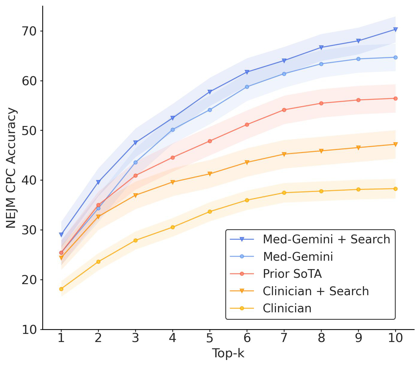

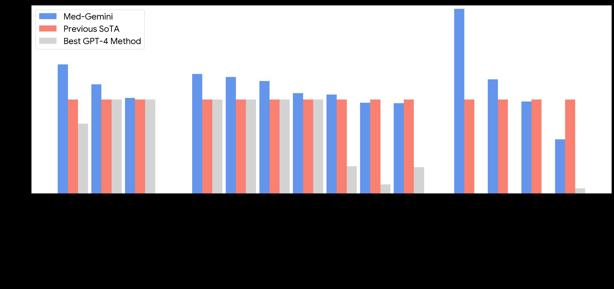

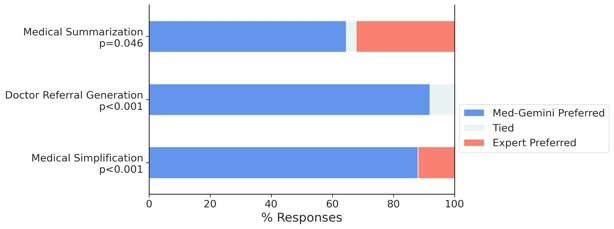

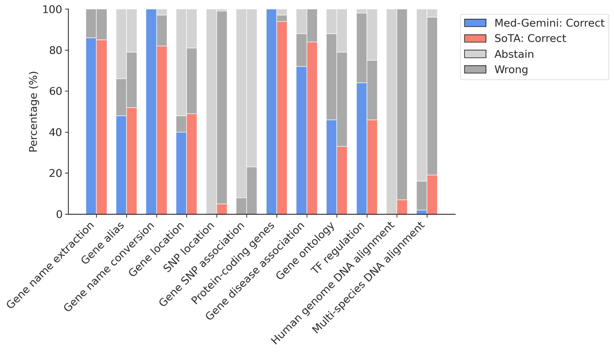

In [ ]:
matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",  # Use image description text embedding
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

# Markdown(print_text_to_image_citation(matching_results_image, print_top=True))
print("\n **** Result: ***** \n")

# Display the top matching image
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
        matching_results_image[3]["img_path"],
    ],
    resize_ratio=0.3,
)

In [ ]:
%%time

print("\n **** Result: ***** \n")

instruction = f"""Answer the question and explain results with the given Image:
Question: {query}
Image:
"""

# Prepare the model input
model_input = [
    instruction,
    # passing all matched images to Gemini
    "Image:",
    matching_results_image[0]["image_object"],
    "Description:",
    matching_results_image[0]["image_description"],
    "Image:",
    matching_results_image[1]["image_object"],
    "Description:",
    matching_results_image[1]["image_description"],
    "Image:",
    matching_results_image[2]["image_object"],
    "Description:",
    matching_results_image[2]["image_description"],
    "Image:",
    matching_results_image[3]["image_object"],
    "Description:",
    matching_results_image[3]["image_description"],
]

# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=model_input,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: user 136 ms, sys: 22.6 ms, total: 158 ms
Wall time: 13.7 s


The images provide a comprehensive view of Med-Gemini's performance across various medical benchmarks relative to  
other models, primarily focusing on accuracy and expert preference.                                                

Here's a breakdown of the insights gleaned from each image and what they tell us about Med-Gemini's capabilities:  

Image 1: NEJM CPC Accuracy                                                                                         

 • Superior Performance: Med-Gemini, both with and without search augmentation, consistently outperforms prior     
   state-of-the-art (SOTA) models and clinician baselines on the NEJM CPC (New England Journal of Medicine Clinical
   Problem Solving Challenge) task.                                                                                
 • Search Augmentation Benefits:  Adding search capabilities boosts the accuracy for both Med-Gemini and clinician 
   performance, highlighting the value of information retrieval in medical reasoning tasks.                        

Image 2: Performance Across Tasks                                                                                  

 • Generally Strong Performance: While specific tasks are unnamed, Med-Gemini demonstrates superior performance    
   compared to the previous SOTA in most categories.                                                               
 • GPT-4 Comparison: Interestingly, the best GPT-4 method lags behind both Med-Gemini and the prior SOTA in most   
   tasks. This suggests a specialized model like Med-Gemini, fine-tuned on medical data, can outperform more       
   general-purpose language models in the medical domain.                                                          

Image 3: Expert Preference                                                                                         

 • High Subjective Preference:  Med-Gemini receives a high percentage of "preferred" responses from experts in     
   tasks like Doctor Referral Generation and Medical Simplification. This suggests the model's outputs align well  
   with expert judgment in these areas.                                                                            
 • Room for Improvement:  In Medical Summarization, while Med-Gemini is still favored, there's a notable proportion
   of "Expert Preferred" responses. This highlights an area where further refinement could enhance alignment with  
   expert preferences.                                                                                             

Image 4: Accuracy in Gene & DNA Tasks                                                                              

 • Strengths in Complex Tasks: Med-Gemini showcases strong performance in tasks like "Protein-coding genes" and    
   "Human genome TF regulation," demonstrating proficiency in handling intricate biological information.           
 • Areas for Attention:  Tasks like "Gene name conversion" and "Multi-species DNA alignment" show a higher         
   "Abstain" rate for Med-Gemini, indicating potential areas where the model may be less confident or the tasks are
   particularly challenging.                                                                                       

Overall, the images paint a picture of Med-Gemini as a high-performing medical AI model. It demonstrates:          

 • Superior Accuracy: Outperforming previous SOTA models and clinician baselines in challenging medical tasks.     
 • Effective Search Augmentation:  Benefitting from incorporating search to improve accuracy further.              
 • Expert Alignment:  Generating responses often preferred by medical experts, particularly in referral generation 
   and medical simplification.                                                                                     
 • Specialization Advantage:  Outperforming even powerful general-purpose language models like GPT-4 in specific   
   medical domains.                          

In [ ]:
## you can check the citations to probe further.
## check the "image description:" which is a description extracted through Gemini which helped search our query.
rich_print(print_text_to_image_citation(matching_results_image, print_top=True))

Citation 1: Matched image path, page number and page text: 

score:  0.66
file_name:  med_gemini.pdf
path:  images/med_gemini.pdf_image_15_0_464.jpeg
page number:  16
page text:  Capabilities of Gemini Models in Medicine
(a) NEJM CPC
(b) GeneTuring
Figure 3 | Generalization of Med-Gemini-L 1.0 with web search to two additional text-based benchmarks. (a):
Comparison of Med-Gemini-L 1.0s top-k accuracy on the NEJM CPC benchmark with prior SoTA LLMs and clinicians, with
and without search. (b): Comparison between Med-Gemini-L 1.0 and SoTA models on the GeneTuring dataset modules.
The bars represent the proportion of correct, incorrect, and abstention responses for each model.
Revisiting MedQA (USMLE) labels
MedQA (USMLE) is a popular benchmark for assessing the
capabilities of LLMs in the medical domain. However, some MedQA test questions have missing
information such as figures or lab results, and potentially outdated ground-truth answers. To address
these concerns, we conduct a complete

None

## Image Search

### Search similar image with image input [using multimodal image embeddings]

Imagine searching for images, but instead of typing words, you use an actual image as the clue.

Think of it like searching with a mini-map instead of a written address.
It's a different way to ask, "Show me more stuff like this".

So, instead of typing "various example of Gemini 1.5 long context", you show a picture of that image and say, "Find me more like this"

For demonstration purposes, we will only be finding similar images that show the various features of Gemini in a single document below. However, you can scale this design pattern to match (find relevant images) across multiple documents.

***Input image from user:***


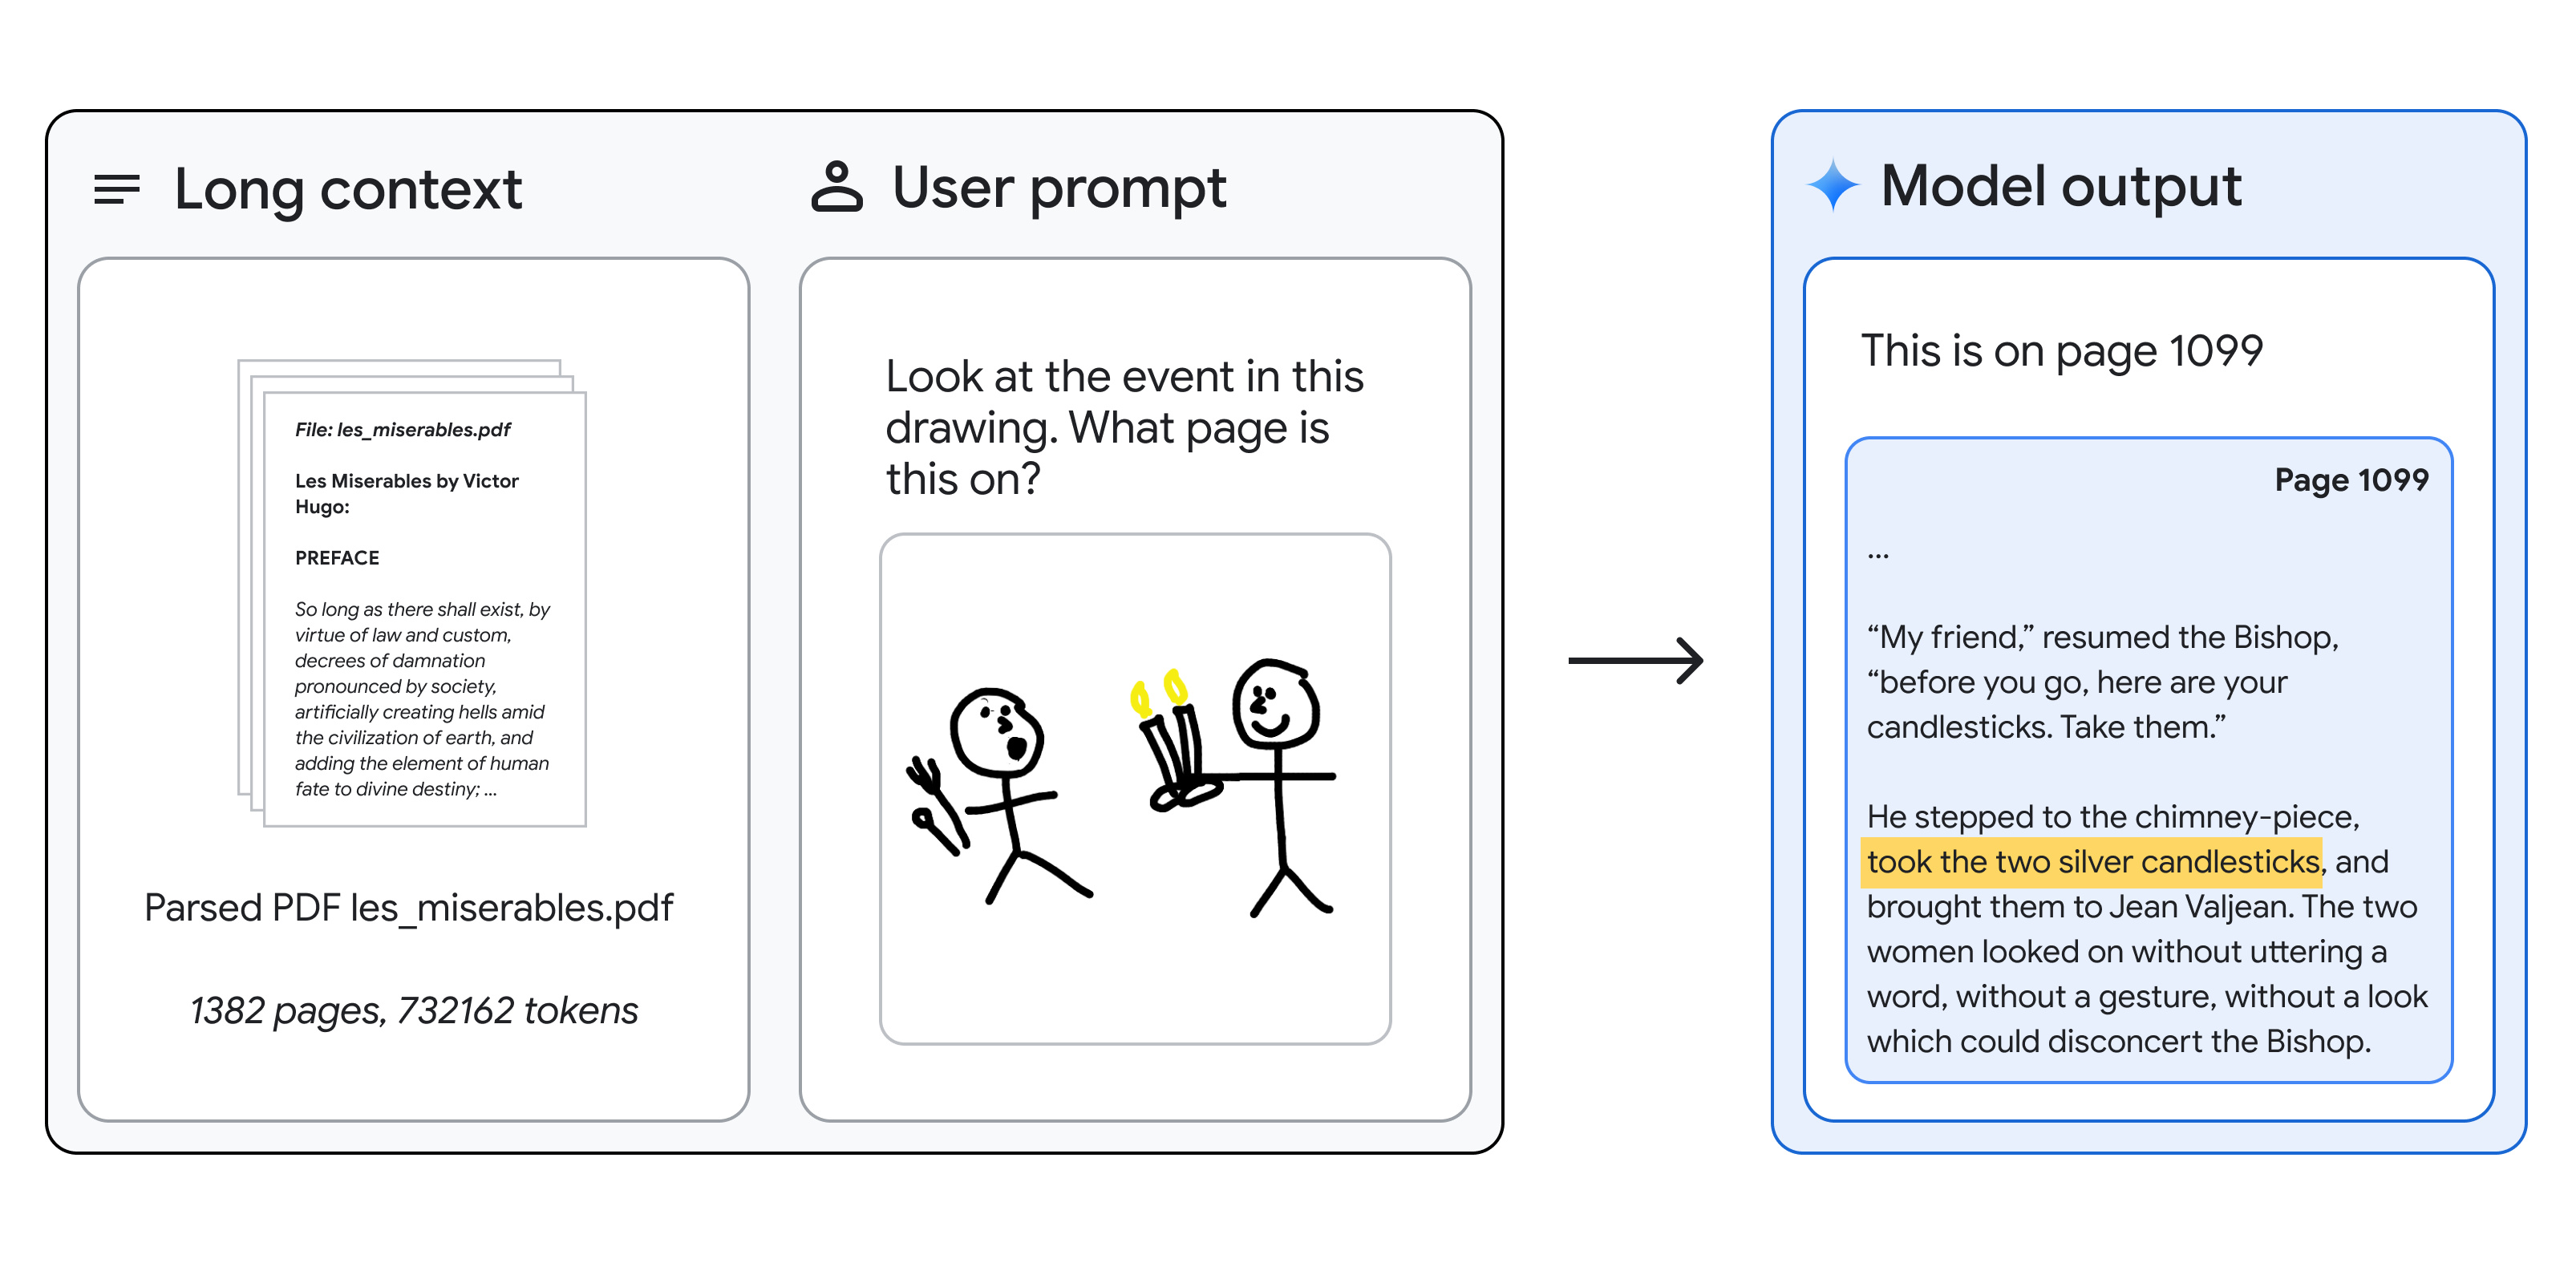

In [ ]:
# You can find a similar image as per the images you have in the metadata.

image_query_path = "images/gemini_v1_5_report_technical.pdf_image_5_0_148.jpeg"

# Print a message indicating the input image
print("***Input image from user:***")

# Display the input image
Image.load_from_file(image_query_path)

You expect to find images that are similar in terms of "long context prompts for Gemini 1.5 Pro"


 **** Result: ***** 



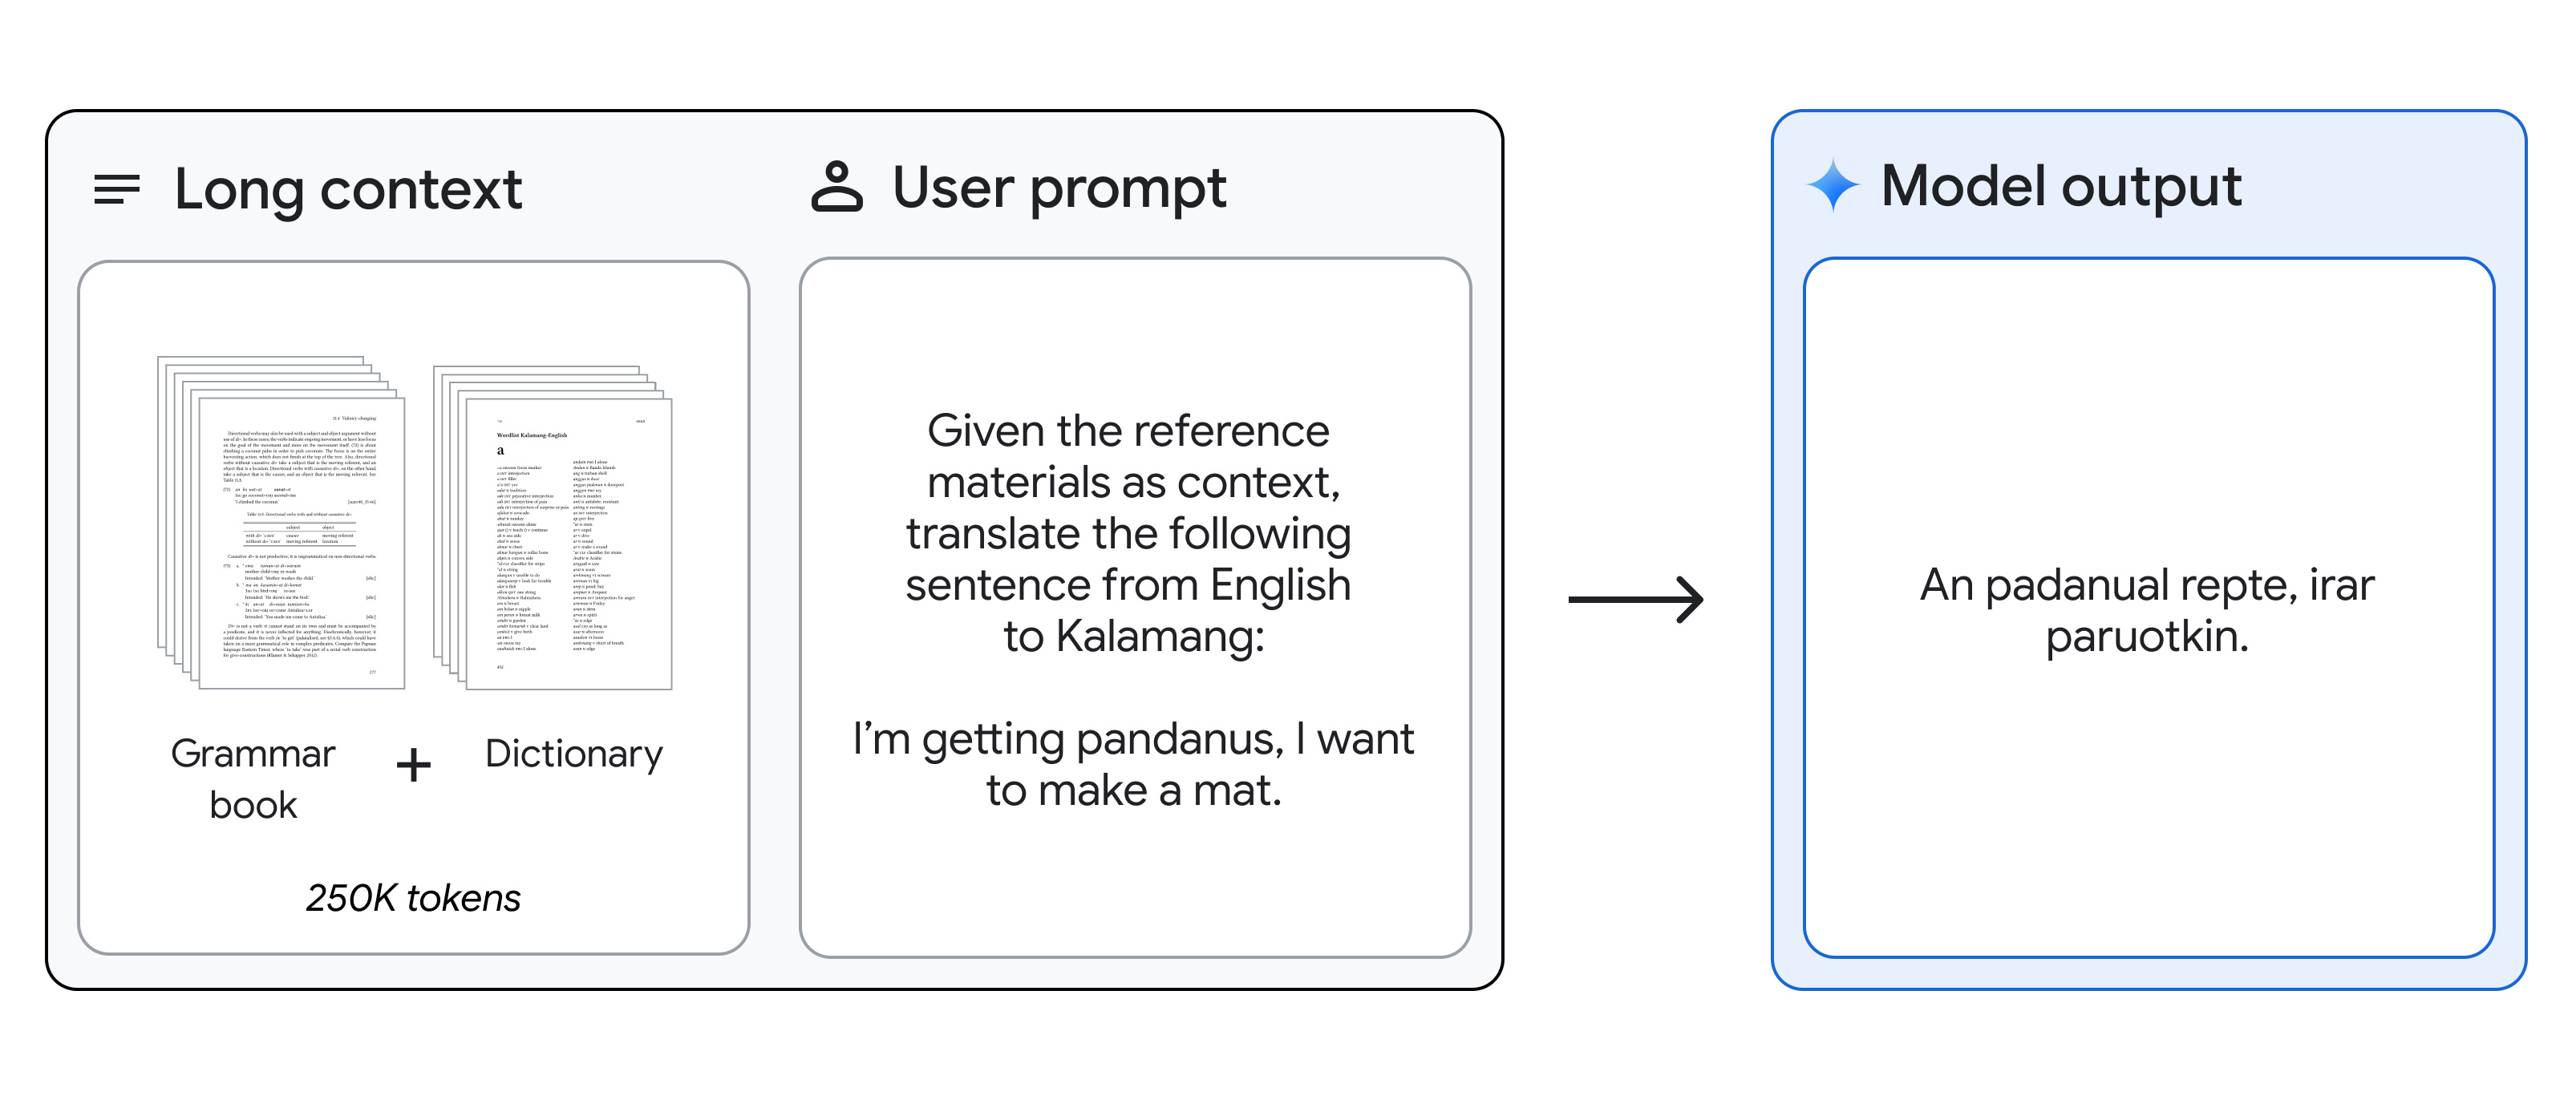

In [ ]:
# Search for Similar Images Based on Input Image and Image Embedding

matching_results_image = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,  # Use query text for additional filtering (optional)
    column_name="mm_embedding_from_img_only",  # Use image embedding for similarity calculation
    image_emb=True,
    image_query_path=image_query_path,  # Use input image for similarity calculation
    top_n=3,  # Retrieve top 3 matching images
    embedding_size=1408,  # Use embedding size of 1408
)

print("\n **** Result: ***** \n")

# Display the Top Matching Image
display(
    matching_results_image[0]["image_object"]
)  # Display the top matching image object (Pillow Image)

You can also print the citation to see what it has matched.

In [ ]:
# Display citation details for the top matching image
print_text_to_image_citation(
    matching_results_image, print_top=True
)  # Print citation details for the top matching image

Citation 1: Matched image path, page number and page text: 

score:  0.84
file_name:  gemini_v1_5_report_technical.pdf
path:  images/gemini_v1_5_report_technical.pdf_image_4_1_143.jpeg
page number:  5
page text:  Gemini 1.5: Unlocking multimodal understanding across millions of tokens of context
4.1. Qualitative Examples of Multimodal Long-Context Capabilities
The ability to process multiple millions of tokens unlocks practical applications that were not possible
before. In this section we demonstrate some surprising interactions we observed with Gemini 1.5 Pro
across code, text and video.
As shown in the Figure 2, Gemini 1.5 Pro is able to ingest entire large codebases such as JAX
(746,152 tokens), and answer very specific queries about them. in Figure 3 we show Gemini 1.5 Pros
ability to learn a new language based only on reference materials given in its input (see Section 4.2.1.7
for quantitative metrics for this use case). Additionally, we test Gemini 1.5 Pros ability to answer
an 

---------------Matched Images------------------



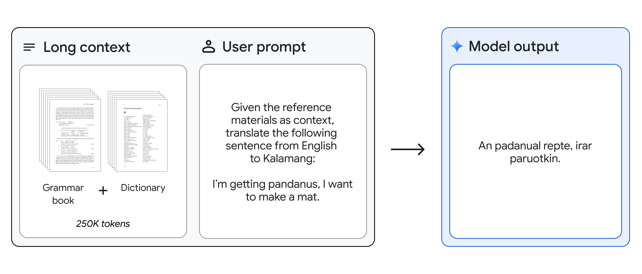

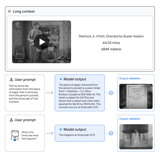

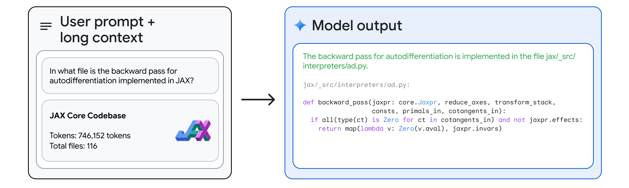

In [ ]:
# Check Other Matched Images (Optional)
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image[0]["img_path"],
        matching_results_image[1]["img_path"],
        matching_results_image[2]["img_path"],
    ],
    resize_ratio=0.2,
)

The ability to identify similar text and images based on user input, using Gemini and embeddings, forms a crucial foundation for development of Multimodal Question Answering System with multimodal RAG design pattern, which you will explore in the coming sections.

### Comparative reasoning

Next, let's apply what you have done so far in doing comparative reasoning.

For this example:

* **Step 1:** You will search all the images for a specific query

* **Step 2:** Send those images to Gemini 1.5 Pro to ask multiple questions, where it has to compare among those images and provide you with answers.

In [ ]:
matching_results_image_query_1 = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query="Show me all the images that can describe LLMs and TPU v5e scaling",
    column_name="text_embedding_from_image_description",  # Use image description text embedding # mm_embedding_from_img_only text_embedding_from_image_description
    image_emb=False,  # Use text embedding instead of image embedding
    top_n=5,
    embedding_size=1408,
)

---------------Matched Images------------------



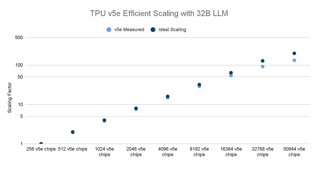

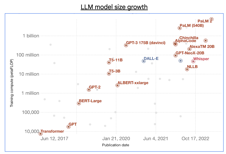

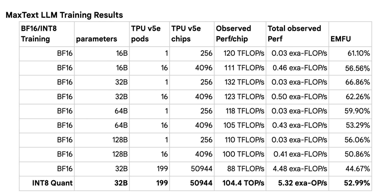

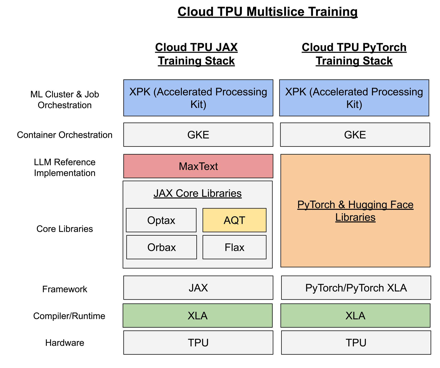

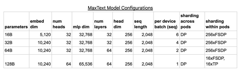

In [ ]:
# Check Matched Images
# You can access the other two matched images using:

print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_query_1[0]["img_path"],
        matching_results_image_query_1[1]["img_path"],
        matching_results_image_query_1[2]["img_path"],
        matching_results_image_query_1[3]["img_path"],
        matching_results_image_query_1[4]["img_path"],
    ],
    resize_ratio=0.2,
)

In [ ]:
prompt = f"""Task: Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points.
Instructions:
1. Analyze the provided images focusing on the relationship between TPU v5e scaling efficiency, LLM model size growth, performance metrics, and quantization effects.
2. Answer the following questions in detail, providing clear reasoning and evidence from the images in bullet points
3. Cite the image sources to support your explanations. Mention the file name.

Additional Considerations:
* Clearly define any technical terms (e.g., EMFU, TFLOP/chip/s) within your answers for better understanding.
* Use specific examples and data points from the images to support your explanations.
* Feel free to request additional information or clarification if the images are unclear or ambiguous.

Question:
 - How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time?
 - How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU v5e chips (e.g., 256)?
 - For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed TFLOP/chip/s?
 - how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this affect the "Total observed Perf"?
 - how might the MFU be impacted by increasing LLM model size?
"""

In [ ]:
%%time
# Generate response with Gemini 1.5 Pro
print("\n **** Result: ***** \n")
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=[
            prompt,
            "Images:",
            matching_results_image_query_1[0]["image_object"],
            matching_results_image_query_1[1]["image_object"],
            matching_results_image_query_1[2]["image_object"],
            matching_results_image_query_1[3]["image_object"],
            matching_results_image_query_1[4]["image_object"],
        ],
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)


 **** Result: ***** 

CPU times: user 195 ms, sys: 39.2 ms, total: 235 ms
Wall time: 21.6 s


Analysis of TPU v5e Scaling Efficiency and LLM Training                              

Let's break down the provided information to understand the relationship between TPU v5e, LLM model size, and      
performance.                                                                                                       

Terminology:                                                                                                       

 • EMFU: Exa Multiply-accumulate operations per second Full Utilization. This metric represents the theoretical    
   peak performance of the TPU system when fully utilized.                                                         
 • TFLOP/chip/s: Tera Floating Point Operations per second per chip. This metric indicates the actual computational
   throughput of each TPU chip.                                                                                    
 • INT8 Quant: INT8 Quantization. This technique reduces the precision of model weights and activations from higher
   precision formats like BF16 (brain float 16) to INT8 (8-bit integer), reducing memory footprint and             
   computational cost.                                                                                             

Answers:                                                                                                           

 1 Scaling Efficiency vs. LLM Model Size Growth:                                                                   
    • Observation: "TPU v5e Efficient Scaling with 32B LLM" (image 1) shows the scaling efficiency of TPU v5e      
      decreases as the number of chips increases.                                                                  
    • Reasoning: While larger TPU systems provide more computational power, the communication overhead and data    
      movement between chips become bottlenecks, reducing overall efficiency. This trend is common in large-scale  
      distributed computing.                                                                                       
    • LLM Growth: "LLM model size growth" (image 2) illustrates the exponential growth of LLM model sizes over     
      time.                                                                                                        
    • Comparison: The declining scaling efficiency of TPUs highlights the challenge of efficiently training        
      increasingly larger LLMs. Even with hardware advancements, maximizing performance requires careful           
      optimization and potentially novel architectural approaches.                                                 
 2 Model Size Impact on Performance (256 Chips):                                                                   
    • Per-chip Performance: "MaxText LLM Training Results" (image 3) shows a decrease in "Per-chip" performance    
      with increasing model size for a fixed 256 TPU v5e chips. For instance, the Per-chip performance drops from  
      132 TFLOP/s (32B model) to 110 TFLOP/s (128B model).                                                         
    • Reasoning: Larger models require more data movement and communication, exceeding the memory bandwidth and    
      inter-chip communication capabilities of the system. This bottleneck leads to reduced per-chip utilization   
      and lower performance.                                                                                       
    • EMFU: The EMFU generally decreases with increasing model size. For example, EMFU drops from 66.86% (32B      
      model) to 56.06% (128B model) on 256 chips.                                                                  
    • Reasoning: This trend reinforces the challenge of keeping all TPU cores fully utilized with larger models.   
      The increased communication overhead and memory bottlenecks prevent achieving maximum theoretical            
      performance.                                                               

## Building Multimodal QA System with retrieval augmented generation (mRAG)

Let's bring everything together to implement multimodal RAG. You will use all the elements that you've explored in previous sections to implement the multimodal RAG. These are the steps:

* **Step 1:** The user gives a query in text format where the expected information is available in the document and is embedded in images and text.
* **Step 2:** Find all text chunks from the pages in the documents using a method similar to the one you explored in `Text Search`.
* **Step 3:** Find all similar images from the pages based on the user query matched with `image_description` using a method identical to the one you explored in `Image Search`.
* **Step 4:** Combine all similar text and images found in steps 2 and 3 as `context_text` and `context_images`.
* **Step 5:** With the help of Gemini, we can pass the user query with text and image context found in steps 2 & 3. You can also add a specific instruction the model should remember while answering the user query.
* **Step 6:** Gemini produces the answer, and you can print the citations to check all relevant text and images used to address the query.

### Step 1: User query

In [ ]:
# this time we are not passing any images, but just a simple text query.

query = """- How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time?
 - How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU v5e chips (e.g., 256)?
 - For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed TFLOP/chip/s?
 - how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this affect the "Total observed Perf"?
 - how might the MFU be impacted by increasing LLM model size?
 """

### Step 2: Get all relevant text chunks

In [ ]:
# Retrieve relevant chunks of text based on the query
matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=20,
    chunk_text=True,
)

### Step 3: Get all relevant images

In [ ]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

### Step 4: Create context_text and context_images

In [ ]:
instruction = """Task: Answer the following questions in detail, providing clear reasoning and evidence from the images and text in bullet points.
Instructions:

1. **Analyze:** Carefully examine the provided images and text context.
2. **Synthesize:** Integrate information from both the visual and textual elements.
3. **Reason:**  Deduce logical connections and inferences to address the question.
4. **Respond:** Provide a concise, accurate answer in the following format:

   * **Question:** [Question]
   * **Answer:** [Direct response to the question]
   * **Explanation:** [Bullet-point reasoning steps if applicable]
   * **Source** [name of the file, page, image from where the information is citied]

5. **Ambiguity:** If the context is insufficient to answer, respond "Not enough context to answer."

"""

# combine all the selected relevant text chunks
context_text = ["Text Context: "]
for key, value in matching_results_chunks_data.items():
    context_text.extend(
        [
            "Text Source: ",
            f"""file_name: "{value["file_name"]}" Page: "{value["page_num"]}""",
            "Text",
            value["chunk_text"],
        ]
    )

# combine all the selected relevant images
gemini_content = [
    instruction,
    "Questions: ",
    query,
    "Image Context: ",
]
for key, value in matching_results_image_fromdescription_data.items():
    gemini_content.extend(
        [
            "Image Path: ",
            value["img_path"],
            "Image Description: ",
            value["image_description"],
            "Image:",
            value["image_object"],
        ]
    )
gemini_content.extend(context_text)

### Step 5: Pass context to Gemini

In [ ]:
# Generate Gemini response with streaming output
rich_Markdown(
    get_gemini_response(
        multimodal_model_15,
        model_input=gemini_content,
        stream=True,
        safety_settings=safety_settings,
        generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
    )
)

 • Question: How does the scaling efficiency of TPU v5e compare to the overall growth in LLM model size over time? 
 • Answer: Not enough context to answer.                                                                           
 • Explanation:                                                                                                    
    • While the text mentions the scaling efficiency of TPU v5e and provides data on its performance with different
      MaxText LLM sizes, it doesn't offer a direct comparison to the overall growth in LLM model size over time.   
    • The "LLM model size growth" chart shows the trend of increasing model size, but we need more specific data on
      TPU v5e's scaling efficiency at each point in time to establish a correlation.                               
 • Question: How does the model size impact the observed Per-chip performance and EMFU for a fixed number of TPU   
   v5e chips (e.g., 256)?                                                                                          
 • Answer: For a fixed number of TPU v5e chips (256), increasing the model size generally leads to a decrease in   
   "Observed Per-chip performance" but doesn't show a clear trend for EMFU.                                        
 • Explanation:                                                                                                    
    • Observing the "MaxText LLM Training Results" table, specifically the rows with 256 TPU v5e chips, as model   
      size increases from 16B to 128B parameters, the "Observed Perchip Perf" decreases (120 TFLOP/s to 110        
      TFLOP/s).                                                                                                    
    • However, EMFU fluctuates without a clear trend. It starts at 61.10% for 16B, peaks at 66.86% for 32B, then   
      decreases to 56.06% for 128B.                                                                                
 • Source: images/Google Cloud TPU blog.pdf_image_13_0_69.jpeg                                                     
 • Question: For the INT8 Quant training with 32B parameters, how does its high EMFU relate to the observed        
   TFLOP/chip/s?                                                                                                   
 • Answer: Not enough context to answer.                                                                           
 • Explanation:                                                                                                    
    • The table provides the EMFU (52.99%) for the INT8 Quant training with 32B parameters.                        
    • However, it doesn't list the observed TOP/chip/s, which is necessary to calculate EMFU based on the formula: 
      EMFU = (observed TOP/chip/s) / (peak hardware TFLOP/chip/s).                                                 
    • Without the observed TOP/chip/s, we can't establish a direct relationship between EMFU and the observed      
      TFLOP/chip/s.                                                                                                
 • Source: images/Google Cloud TPU blog.pdf_image_13_0_69.jpeg and images/Google Cloud TPU                         
   blog.pdf_image_12_0_66.jpeg                                                                                     
 • Question: how does the "per device batch (seq)" for a 16B model compare to a 128B model, and how does this      
   affect the "Total observed Perf"?                                                                               
 • Answer:  The "per device batch (seq)" for a 16B model (6) is six times larger than a 128B model (1). This       
   difference in batch size likely contributes to the 16B model having a lower "Total observed Perf" compared to   
   the 128B model, despite having higher "Observed Perchip Perf".                                                  
 • Explanation:                                         

### Step 6: Print citations and references [Optional]

**Optional:** Uncomment to see the detailed citations.

In [ ]:
# print("---------------Matched Images------------------\n")
# display_images(
#     [
#         matching_results_image_fromdescription_data[0]["img_path"],
#         matching_results_image_fromdescription_data[1]["img_path"],
#     ],
#     resize_ratio=0.2,
# )

In [ ]:
# # Image citations. You can check how Gemini generated metadata helped in grounding the answer.

# print_text_to_image_citation(
#     matching_results_image_fromdescription_data, print_top=True
# )

In [ ]:
# # Text citations

# print_text_to_text_citation(
#     matching_results_chunks_data,
#     print_top=True,
#     chunk_text=True,
# )

### Multimodal RAG

### More questions with Multimodal QA System

In [ ]:
# Some questions to try
# this time we are not passing any images, but just a simple text query.
query = """Question 1: Imagine a patient presents with new onset prurigo nodularis.
Could Med-Gemini-M 1.5 be used to analyze dermatological images of the patient's lesions in conjunction with a comprehensive history taken
from an EHR dialogue to help a clinician reach a diagnosis and develop a treatment plan?
What are the limitations and potential ethical considerations of using the model in this way?

Question 2: The paper focuses on uncertainty-guided search for text-based reasoning tasks.
How could this approach be extended to multimodal tasks?
For instance, if Med-Gemini-M 1.5 encounters uncertainty when analyzing a dermatology image, could it generate queries to
search for relevant visual examples or supplemental clinical information to refine its interpretation?

Question 3:  Considering the potential benefits and risks highlighted in the paper, what specific steps should be taken during the development,
validation, and deployment of Med-Gemini models to ensure they are used safely, fairly, and effectively in real-world clinical settings?
How can these steps be informed by ongoing collaboration between researchers, clinicians, regulators, and patient communities?
 """

(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_15,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

Med-Gemini Analysis:                                                

Question 1: Imagine a patient presents with new-onset prurigo nodularis. Could Med-Gemini-M 1.5 be used to analyze 
dermatological images of the patient's lesions in conjunction with a comprehensive history taken from an EHR       
dialogue to help a clinician reach a diagnosis and develop a treatment plan? What are the limitations and potential
ethical considerations of using the model in this way?                                                             

Answer: While Med-Gemini-M 1.5 shows promise for multimodal diagnosis, it's not ready for real-world deployment in 
its current form.                                                                                                  

Explanation:                                                                                                       

 • Potential:                                                                                                      
    • Multimodal Integration: Med-Gemini-M 1.5 demonstrates the ability to analyze both text (EHR dialogues) and   
      images (dermatological photos), potentially aiding in prurigo nodularis diagnosis.                           
    • Diagnosis & Treatment Suggestions:  Figure 6a showcases a hypothetical dialogue where Med-Gemini-M 1.5       
      accurately diagnoses prurigo nodularis from a patient description and image, and provides treatment options. 
      Source: med_gemini.pdf, Page 18, 19, Figure 6a                                                               
 • Limitations:                                                                                                    
    • Limited Data: Figure 6b highlights that the example relies on "limited data" of one photo and brief          
      description. More comprehensive data is needed for robust diagnosis. Source: med_gemini.pdf, Page 19, Figure 
      6b                                                                                                           
    • Lack of Real-world Validation: The paper acknowledges the need for "considerable further research and        
      development" before real-world use. Source: med_gemini.pdf, Page 19                                          
 • Ethical Considerations:                                                                                         
    • Bias:  The model's training data could contain biases, leading to inaccurate or unfair diagnoses for certain 
      demographics.                                                                                                
    • Over-reliance: Clinicians might over-rely on the model's output, potentially missing crucial nuances in      
      patient history or symptoms.                                                                                 
    • Patient Privacy:  Integrating patient data raises privacy concerns, requiring robust data security and       
      informed consent protocols.                                                                                  

Source: med_gemini.pdf, Pages 18-19, Figure 6                                                                      

Question 2: The paper focuses on uncertainty-guided search for text-based reasoning tasks. How could this approach 
be extended to multimodal tasks? For instance, if Med-Gemini-M 1.5 encounters uncertainty when analyzing a         
dermatology image, could it generate queries to search for relevant visual examples or supplemental clinical       
information to refine its interpretation?                                                                          

Answer: Yes, uncertainty-guided search can be extended to multimodal tasks.  Med-Gemini-M 1.5 could generate       
queries for both visual and textual information to reduce uncertainty.                                             

Explanation:                                                                                   

In [ ]:
# Some questions to try

query = """Question 1: How does the mixture-of-experts architecture in Gemini 1.5 Pro contribute to its ability to handle long
context while maintaining performance on core capabilities? Discuss the potential trade-offs involved.

Question 2: Gemini 1.5 Pro incorporates various safety mitigations, including supervised fine-tuning and reinforcement learning.
Discuss the effectiveness of these mitigations in addressing content safety and representational harms in both text-to-text and
image-to-text modalities. How can these evaluations be improved?

Question 3: Gemini 1.5 Pro demonstrates surprising in-context language learning capabilities for Kalamang,
a low-resource language. What are the implications of this finding for language preservation and revitalization?
What challenges need to be addressed for broader applicability of this approach?
"""
(
    response,
    matching_results_chunks_data,
    matching_results_image_fromdescription_data,
) = get_answer_from_qa_system(
    query,
    text_metadata_df,
    image_metadata_df,
    top_n_text=10,
    top_n_image=5,
    model=multimodal_model_15,
    safety_settings=safety_settings,
    generation_config=GenerationConfig(temperature=1, max_output_tokens=8192),
)

rich_Markdown(response)

Question 1:                                                    

Question: How does the mixture-of-experts architecture in Gemini 1.5 Pro contribute to its ability to handle long  
context while maintaining performance on core capabilities? Discuss the potential trade-offs involved.             

Answer: The mixture-of-experts (MoE) architecture enables Gemini 1.5 Pro to handle long contexts by selectively    
activating specific expert networks for different parts of the input. This sparsity allows for processing longer   
sequences without a proportional increase in computational cost, leading to improved long-context performance while
maintaining core capabilities.                                                                                     

Explanation:                                                                                                       

 • MoE for Long Context: Traditional transformer models struggle with long sequences due to quadratic complexity.  
   MoE addresses this by using multiple expert networks, each specializing in different aspects of the data. For   
   any given input, only a subset of these experts are activated, enabling efficient processing of longer          
   sequences. ("gemini_v1_5_report_technical.pdf", Page 2)                                                         
 • Maintaining Core Capabilities: The text states that the improved long-context performance "does not come at the 
   expense of multi-modal core capabilities." This suggests that the model's ability to excel in core tasks, likely
   those requiring shorter context lengths, is maintained. ("gemini_v1_5_report_technical.pdf", Page 30)           

Potential Trade-offs:                                                                                              

 • Complexity: MoE models are inherently more complex to train and require careful routing mechanisms to select    
   appropriate experts, potentially increasing training and inference costs.                                       
 • Interpretability:  The selective activation of experts can make it harder to interpret the model's              
   decision-making process compared to standard transformer architectures.                                         


                                                    Question 2:                                                    

Question: Gemini 1.5 Pro incorporates various safety mitigations, including supervised fine-tuning and             
reinforcement learning. Discuss the effectiveness of these mitigations in addressing content safety and            
representational harms in both text-to-text and image-to-text modalities. How can these evaluations be improved?   

Answer: Not enough context to answer.                                                                              

Explanation: While the text mentions the use of safety mitigations, it doesn't provide specific details about their
effectiveness in addressing content safety and representational harms.  The provided text focuses on the model's   
architecture and performance on various tasks but lacks information on safety evaluations and mitigation           
strategies.                                                                                                        


                                                    Question 3:                                                    

Question: Gemini 1.5 Pro demonstrates surprising in-context language learning capabilities for Kalamang, a         
low-resource language. What are the implications of this finding for language preservation and revitalization? What
challenges need to be addressed for broader applicability of this approach?                                        

Answer: Gemini 1.5 Pro's ability to learn Kalamang translation from limited resources has significant implications 
for language preservation and revitalization. It suggests large language models can leverage 

## Conclusions

Congratulations on making it through this multimodal RAG notebook!

While multimodal RAG can be quite powerful, note that it can face some limitations:

* **Data dependency:** Needs high-quality paired text and visuals.
* **Computationally demanding:** Processing multimodal data is resource-intensive.
* **Domain specific:** Models trained on general data may not shine in specialized fields like medicine.
* **Black box:** Understanding how these models work can be tricky, hindering trust and adoption.


Despite these challenges, multimodal RAG represents a significant step towards search and retrieval systems that can handle diverse, multimodal data.